## Final Project Submission

Please fill out:
* Student name: Drake Fitzsimmons
* Student pace: Full-time
* Scheduled project review date/time: 3/23/21
* Instructor name: James Irving
* Blog post URL:


## Business Problem

Microsoft is looking for recommendations on what movies do the best at the box office. They will use this information to make informed decisions on starting a new movie studio. They would like actionable insights on past movie performance to help decide what types of films to create. This project will review data provided by the client from IMDb and Box OFfice Mojo to create recommendations that Microsoft can use in their new business venture.

## Obtain and Review Data

First, we must import libraries that we will use to analyze the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, let's read the data provided to us for the analysis. We will use 3 data sources to simplify the analysis.

In [2]:
df_basics = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
df_ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
df_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

Using pandas, the csv files are read. Let's display information to determine what we we have.

In [3]:
print('\n'+'---'*25)
print('df_basics preview')
display(df_basics)
print('\n'+'---'*25)
print('df_ratings preview')
display(df_ratings)
print('\n'+'---'*25)
print('df_gross preview')
display(df_gross)
print('\n')


---------------------------------------------------------------------------
df_basics preview


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN



---------------------------------------------------------------------------
df_ratings preview


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5



---------------------------------------------------------------------------
df_gross preview


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We see that the dataframes are different sizes and have different columns, but there are some common columns on which we can combine the dataframes. We will explore the data further while we clean it for easier use.

## Data Cleaning

### Combining Basics & Ratings
First, the dataframes must be combined in order to compare across different variables. We know that there is a common column between df_basics and df_ratings. Let's start there.

In [4]:
df_basics_ratings = df_basics.merge(df_ratings,how='inner',on='tconst')
df_basics_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


df_basics_ratings is a new dataframe that combined df_basics and df_ratings. The total rows in df_basics_ratings is equal to the total number of rows in df_ratings. Presumably every row in df_ratings had a corresponding row in df_basics and all rows unique to df_basics have been removed. Let's check.

In [5]:
print(df_basics_ratings.isna().sum())
df_dup_check = df_basics_ratings[df_basics_ratings.duplicated('tconst')]
df_dup_check

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [6]:
df_dup_check = df_basics[df_basics.duplicated('tconst')]
df_dup_check

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [7]:
df_dup_check = df_ratings[df_ratings.duplicated('tconst')]
df_dup_check

,tconst,averagerating,numvotes


We can see that there are no null values in the averagerating and numvotes columns. Also there are no duplicate tconst values in df_basics_ratings, df_basics, or df_ratings. This confirms that we removed rows from df_basics that did not have a corresponding tconst in df_ratings.

### Combining Revenue
Next we must combine df_gross to our newly created df_basics_ratings dataframe. Let's find a common column to combine with.

In [8]:
print('\n'+'---'*25)
print('df_basics_ratings preview')
display(df_basics)
print('\n'+'---'*25)
print('df_gross preview')
display(df_gross)


---------------------------------------------------------------------------
df_basics_ratings preview


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN



---------------------------------------------------------------------------
df_gross preview


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Common columns include title and year. Unfortunately in df_basics_ratings, there are two versions of title: primary_title and original_title. Ultimately we will have to check to see if titles in df_gross match with primary_title or original_title. But first let's see if there are any duplicates in df_gross that we should deal with.

In [9]:
df_dup_check = None
df_dup_check = df_gross[df_gross.duplicated('title', keep = False)]
df_dup_check

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


There are two movies with the title Bluebeard made by different studios in different years. There is no need to worry though, because we can merge df_gross with df_basics_ratings using two criteria, title and year. Since the years are different there shouldn't be a problem.

Let's merge df_gross with df_basics_ratings.

In [10]:
df_combined = df_basics_ratings.merge(df_gross,how='inner',
                                      left_on = ['primary_title','start_year'],
                                      right_on = ['title','year'])
df_combined

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,tt8290698,The Spy Gone North,Gongjak,2018,137.0,Drama,7.2,1620,The Spy Gone North,CJ,501000.0,NaN,2018
1843,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,How Long Will I Love U,WGUSA,747000.0,82100000,2018
1844,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018
1845,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,Last Letter,CL,181000.0,NaN,2018


Great, now we have a combined dataframe. But we only combined based on primary_title. Let's ensure that there weren't any movies which the original title would match with a movie in df_gross.

In [11]:
df_unequal_titles = df_basics_ratings.loc[df_basics_ratings['primary_title'] != df_basics_ratings['original_title']]
df_unequal_titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
73804,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50
73824,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301
73829,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",6.2,6
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14


There are 12,173 movies where the primary_title does not equal the original_title. Let's see which of these movies match with df_gross.

In [12]:
df_unequal_titles = df_unequal_titles.merge(df_gross,how='inner',
                                      left_on = ['original_title','start_year'],
                                      right_on = ['title','year'])
df_unequal_titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt1139592,Jeepers Creepers III,Jeepers Creepers 3,2017,100.0,"Action,Horror,Mystery",4.1,14586,Jeepers Creepers 3,Scre.,2300000.0,NaN,2017
1,tt1433813,Hubble,Hubble 3D,2010,44.0,Documentary,7.7,3945,Hubble 3D,WB,52400000.0,21500000,2010
2,tt1477076,Saw 3D: The Final Chapter,Saw 3D,2010,90.0,"Crime,Horror,Mystery",5.6,83532,Saw 3D,LGF,45700000.0,90400000,2010
3,tt1620719,Fearless,Dabangg,2010,126.0,"Action,Comedy,Crime",6.3,25201,Dabangg,Eros,1300000.0,1700000,2010
4,tt1629376,Seven Sins Forgiven,7 Khoon Maaf,2011,137.0,"Drama,Mystery,Thriller",6.1,4948,7 Khoon Maaf,UTV,270000.0,94700,2011
5,tt3148502,The Spectacle,Tamasha,2015,139.0,"Comedy,Drama,Romance",7.2,19901,Tamasha,UTV,2100000.0,NaN,2015
6,tt3173910,"She Smiles, She's Snared!",Hasee Toh Phasee,2014,141.0,"Comedy,Romance",6.8,12406,Hasee Toh Phasee,Relbig.,646000.0,NaN,2014
7,tt3381068,Gnome Alone,Legend,2015,94.0,Horror,3.5,303,Legend,Uni.,1900000.0,41100000,2015
8,tt3595298,Found a Treasure Called Love,Prem Ratan Dhan Payo,2015,164.0,"Action,Drama,Family",4.6,15753,Prem Ratan Dhan Payo,FIP,4400000.0,48200000,2015
9,tt3698118,Gangnam Blues,Gangnam 1970,2015,135.0,"Action,Drama",6.3,1291,Gangnam 1970,CJ,18000.0,NaN,2015


There are 18 movies that match based on original_title and not primary_title. We should include these in the combined dataframe.

In [13]:
dataframes = [df_combined, df_unequal_titles]
df_combined = pd.concat(dataframes)
df_combined

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,tt5162658,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Oro,Sony,5500.0,NaN,2017
14,tt6217804,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,Tyler Perry's Boo 2! A Madea Halloween,LGF,47300000.0,1000000,2017
15,tt6588966,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Hichki,Yash,330000.0,3900000,2018
16,tt7690670,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Superfly,Sony,20500000.0,236000,2018


Now we have all the data we need combined into 1 dataframe. Let's clean up our column names and then dig into any data we need to clean up.

### Removing Unused Columns
There are columns which are now duplicates and columns that don't really mean much to us. Let's remove tconst because it doesn't have relevant meaning as well as title and year because they are just duplicate columns now.

In [14]:
# del df_combined['tconst']
# del df_combined['title']
# del df_combined['year']
df_combined.drop(columns=['tconst','title','year'],inplace=True)
df_combined

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4"
...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,NaN
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,LGF,47300000.0,1000000
15,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Yash,330000.0,3900000
16,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000


Great, that's easier to work with. Now let's take a deeper look into what data we actually have.

### Removing Duplicates
Now that we have all our data in one place let's see if we have any duplicate rows.

In [15]:
df_dup_check = None
df_dup_check = df_combined[df_combined.duplicated('primary_title', keep = False)]
df_dup_check

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
140,The Bounty Hunter,The Bounty Hunter,2010,110.0,"Action,Comedy,Romance",5.6,112444,Sony,67099999.0,69300000
141,The Bounty Hunter,The Bounty Hunter,2010,NaN,NaN,6.3,29,Sony,67099999.0,69300000
167,Big Eyes,Big Eyes,2014,106.0,"Biography,Crime,Drama",7.0,77447,Wein.,14500000.0,14800000
168,Big Eyes,Big Eyes,2014,NaN,Documentary,7.2,43,Wein.,14500000.0,14800000
169,Burlesque,Burlesque,2010,119.0,"Drama,Music,Musical",6.4,71021,SGem,39400000.0,50100000
170,Burlesque,Burlesque,2010,NaN,Drama,7.0,45,SGem,39400000.0,50100000
195,Jai Ho,Jai Ho,2014,135.0,"Action,Drama",5.3,15531,Eros,1300000.0,NaN
196,Jai Ho,Jai Ho,2014,60.0,"Biography,Documentary,Music",7.6,34,Eros,1300000.0,NaN
225,Leap Year,Leap Year,2010,100.0,"Comedy,Romance",6.5,86125,Uni.,25900000.0,6700000
226,Leap Year,Año bisiesto,2010,94.0,"Drama,Romance",5.9,2211,Uni.,25900000.0,6700000


As you can see, there are quiet a few movies with the same title. But it's possible that some movies would have the same title. It's unlikely that the a studio would produce 2 movies with the same title in the same year. Let's make a new column to include title, year, and studio. 

In [16]:
df_combined['title_year_studio'] = df_combined['primary_title'].astype(str)\
                                    + df_combined['start_year'].astype(str)\
                                    + df_combined['studio'].astype(str)
df_combined

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,title_year_studio
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,Wazir2016Relbig.
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,On the Road2012IFC
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,The Secret Life of Walter Mitty2013Fox
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,A Walk Among the Tombstones2014Uni.
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",Jurassic World2015Uni.
...,...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,NaN,Gold2017Sony
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,LGF,47300000.0,1000000,Boo 2! A Madea Halloween2017LGF
15,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Yash,330000.0,3900000,Hiccup2018Yash
16,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000,SuperFly2018Sony


Now, using our new column, let's check for duplicates.

In [17]:
df_dup_check = None
df_combined.sort_values(by='numvotes')
df_combined.sort_values(by='primary_title')
df_dup_check = df_combined[df_combined.duplicated('title_year_studio', keep = False)]
df_dup_check
#sort values - by can be a list, inplace = True

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,title_year_studio
140,The Bounty Hunter,The Bounty Hunter,2010,110.0,"Action,Comedy,Romance",5.6,112444,Sony,67099999.0,69300000,The Bounty Hunter2010Sony
141,The Bounty Hunter,The Bounty Hunter,2010,NaN,NaN,6.3,29,Sony,67099999.0,69300000,The Bounty Hunter2010Sony
167,Big Eyes,Big Eyes,2014,106.0,"Biography,Crime,Drama",7.0,77447,Wein.,14500000.0,14800000,Big Eyes2014Wein.
168,Big Eyes,Big Eyes,2014,NaN,Documentary,7.2,43,Wein.,14500000.0,14800000,Big Eyes2014Wein.
169,Burlesque,Burlesque,2010,119.0,"Drama,Music,Musical",6.4,71021,SGem,39400000.0,50100000,Burlesque2010SGem
170,Burlesque,Burlesque,2010,NaN,Drama,7.0,45,SGem,39400000.0,50100000,Burlesque2010SGem
195,Jai Ho,Jai Ho,2014,135.0,"Action,Drama",5.3,15531,Eros,1300000.0,NaN,Jai Ho2014Eros
196,Jai Ho,Jai Ho,2014,60.0,"Biography,Documentary,Music",7.6,34,Eros,1300000.0,NaN,Jai Ho2014Eros
225,Leap Year,Leap Year,2010,100.0,"Comedy,Romance",6.5,86125,Uni.,25900000.0,6700000,Leap Year2010Uni.
226,Leap Year,Año bisiesto,2010,94.0,"Drama,Romance",5.9,2211,Uni.,25900000.0,6700000,Leap Year2010Uni.


There are still quite a few duplicate rows. When looking at the rows, it seems like the entry with the most votes also has the most complete data set. Let's remove the duplicates that have less votes.

In [18]:
df_combined.sort_values(by='numvotes', ascending=False)
df_combined.drop_duplicates('title_year_studio', keep='first', inplace=True)
df_combined
#sort inplace=true

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,title_year_studio
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,Wazir2016Relbig.
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,On the Road2012IFC
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,The Secret Life of Walter Mitty2013Fox
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,A Walk Among the Tombstones2014Uni.
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",Jurassic World2015Uni.
...,...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,NaN,Gold2017Sony
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,LGF,47300000.0,1000000,Boo 2! A Madea Halloween2017LGF
15,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Yash,330000.0,3900000,Hiccup2018Yash
16,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000,SuperFly2018Sony


Let's remove the title_year_studio column we made. It's no longer needed.

In [19]:
del df_combined['title_year_studio']
df_combined
#use drop

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4"
...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,NaN
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,LGF,47300000.0,1000000
15,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Yash,330000.0,3900000
16,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000


Now that we have all our data without duplicates, let's address any missing data.

### Missing Data
Let's see if there is any missing data which we should address before making comparisons.

In [20]:
df_combined.info()
df_combined.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 0 to 17
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1840 non-null   object 
 1   original_title   1840 non-null   object 
 2   start_year       1840 non-null   int64  
 3   runtime_minutes  1839 non-null   float64
 4   genres           1840 non-null   object 
 5   averagerating    1840 non-null   float64
 6   numvotes         1840 non-null   int64  
 7   studio           1838 non-null   object 
 8   domestic_gross   1830 non-null   float64
 9   foreign_gross    1263 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 158.1+ KB


primary_title        0
original_title       0
start_year           0
runtime_minutes      1
genres               0
averagerating        0
numvotes             0
studio               2
domestic_gross      10
foreign_gross      577
dtype: int64

We see that there is missing data in runtime_minutes, studio, domestic_gross and foreign_gross columns. Let's address these issues one at a time.

#### Missing Runtime
Let's see which movie has a null runtime.

In [21]:
df_combined[df_combined['runtime_minutes'].isna()]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
1294,Extraction,Extraction,2015,NaN,"Action,Crime,Thriller",5.1,16,LGP,16800.0,NaN


We don't have very many details about this movie, but there were only 16 votes on IMDB and it only made $16,800, so it's safe to say that we can remove this movie from our dataset.

In [22]:
df_combined.drop(index=1294,inplace=True)

Let's check if our drop worked.

In [23]:
df_combined[df_combined['runtime_minutes'].isna()]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross


We can see that Extraction is no longer included in our dataframe.

#### Missing Studio
As we did above with runtime, let's look at movies with missing studios.

In [24]:
df_combined[df_combined['studio'].isna()]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
931,Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950,NaN,NaN,4000000
1726,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563,NaN,NaN,122000000


We see that there are two films that were only foreign releases. Although these films likely won't make a huge impact on our data analysis, it won't hurt to keep them. We will use No Studio as an indicator that we don't have info about the studio. 

In [25]:
df_combined['studio'].fillna('No Studio',inplace=True)
df_combined[df_combined['studio'] == 'No Studio']

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
931,Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950,No Studio,NaN,4000000
1726,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563,No Studio,NaN,122000000


Now we no longer have NaN for Studios

#### Missing Domestic Gross

Let's see which movie has a null domestic gross.

In [26]:
df_combined[df_combined['domestic_gross'].isna()]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
306,It's a Wonderful Afterlife,It's a Wonderful Afterlife,2010,100.0,"Comedy,Drama,Fantasy",5.4,1361,UTV,NaN,1300000
466,Dark Tide,Dark Tide,2012,94.0,"Action,Adventure,Drama",4.3,7682,WHE,NaN,432000
513,Celine: Through the Eyes of the World,Celine: Through the Eyes of the World,2010,120.0,"Documentary,Music",7.9,349,Sony,NaN,119000
571,White Lion,White Lion,2010,88.0,"Drama,Family",6.7,828,Scre.,NaN,99600
621,The Tall Man,The Tall Man,2012,106.0,"Crime,Drama,Horror",5.9,36331,Imag.,NaN,5200000
844,Force,Force,2011,137.0,"Action,Thriller",6.4,6348,FoxS,NaN,4800000
931,Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950,No Studio,NaN,4000000
1011,Jessabelle,Jessabelle,2014,90.0,"Horror,Thriller",5.4,20552,LGF,NaN,7000000
1145,Viral,Viral,2016,85.0,"Drama,Horror,Sci-Fi",5.5,7150,W/Dim.,NaN,552000
1726,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563,No Studio,NaN,122000000


All movies with NaN for domestic gross have foreign gross. We will assume these movies only had international releases and we will set NaN to 0. Let's first check to see if there are other movies with domestic gross = 0.

In [27]:
df_combined[df_combined['domestic_gross']==0]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross


Great, we don't. So we don't have to worry about setting NaN to 0.

In [28]:
df_combined['domestic_gross'].fillna(0,inplace=True)
df_combined[df_combined['domestic_gross'] == 0]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
306,It's a Wonderful Afterlife,It's a Wonderful Afterlife,2010,100.0,"Comedy,Drama,Fantasy",5.4,1361,UTV,0.0,1300000
466,Dark Tide,Dark Tide,2012,94.0,"Action,Adventure,Drama",4.3,7682,WHE,0.0,432000
513,Celine: Through the Eyes of the World,Celine: Through the Eyes of the World,2010,120.0,"Documentary,Music",7.9,349,Sony,0.0,119000
571,White Lion,White Lion,2010,88.0,"Drama,Family",6.7,828,Scre.,0.0,99600
621,The Tall Man,The Tall Man,2012,106.0,"Crime,Drama,Horror",5.9,36331,Imag.,0.0,5200000
844,Force,Force,2011,137.0,"Action,Thriller",6.4,6348,FoxS,0.0,4800000
931,Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950,No Studio,0.0,4000000
1011,Jessabelle,Jessabelle,2014,90.0,"Horror,Thriller",5.4,20552,LGF,0.0,7000000
1145,Viral,Viral,2016,85.0,"Drama,Horror,Sci-Fi",5.5,7150,W/Dim.,0.0,552000
1726,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563,No Studio,0.0,122000000


Mission accomplished!

#### Missing Foreign Gross

Finally, let's set all NaN under foreign_gross = 0. But first let's check if there are other foreign_gross = 0 which we should differentiate.

In [29]:
df_combined[df_combined['foreign_gross']==0]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross


Looks good, now we can make our change.

In [30]:
df_combined['foreign_gross'].fillna(0,inplace=True)
df_combined[df_combined['foreign_gross'] == 0]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0
6,American Pastoral,American Pastoral,2016,108.0,"Crime,Drama",6.1,12898,LGF,544000.0,0
11,The Stanford Prison Experiment,The Stanford Prison Experiment,2015,122.0,"Biography,Drama,History",6.9,32591,IFC,661000.0,0
23,Being Flynn,Being Flynn,2012,102.0,Drama,6.4,15780,Focus,540000.0,0
31,Margaret,Margaret,2011,150.0,Drama,6.5,14708,FoxS,46500.0,0
...,...,...,...,...,...,...,...,...,...,...
6,"She Smiles, She's Snared!",Hasee Toh Phasee,2014,141.0,"Comedy,Romance",6.8,12406,Relbig.,646000.0,0
9,Gangnam Blues,Gangnam 1970,2015,135.0,"Action,Drama",6.3,1291,CJ,18000.0,0
11,Luis and the Aliens,Luis & the Aliens,2018,86.0,"Adventure,Animation,Comedy",6.0,1355,VPD,170000.0,0
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,0


Looks like we accomplished our task!

#### Missing Data Confirmation

Great. Let's do one last check to see if we have any other missing data.

In [31]:
df_combined.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
dtype: int64

All right! All missing data is fixed up and we can move onto data formatting!

### Data Formatting
Let's take a look at the datatypes we have and see if we have to make any adjustments.

In [32]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 17
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1839 non-null   object 
 1   original_title   1839 non-null   object 
 2   start_year       1839 non-null   int64  
 3   runtime_minutes  1839 non-null   float64
 4   genres           1839 non-null   object 
 5   averagerating    1839 non-null   float64
 6   numvotes         1839 non-null   int64  
 7   studio           1839 non-null   object 
 8   domestic_gross   1839 non-null   float64
 9   foreign_gross    1839 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 158.0+ KB


In [33]:
df_compare=df_combined.copy()

We see that foreign_gross is an object. We should change that to a float in order to use it in conjunction with domestic_gross.

After further investigation, some foreign_gross objects contain commas. We will have to remove the commas in order to convert foreign_gross to a float.

In [34]:
df_combined['foreign_gross'] = df_combined['foreign_gross'].str.replace(',','')
df_combined['foreign_gross'] = df_combined['foreign_gross'].astype(float)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 17
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1839 non-null   object 
 1   original_title   1839 non-null   object 
 2   start_year       1839 non-null   int64  
 3   runtime_minutes  1839 non-null   float64
 4   genres           1839 non-null   object 
 5   averagerating    1839 non-null   float64
 6   numvotes         1839 non-null   int64  
 7   studio           1839 non-null   object 
 8   domestic_gross   1839 non-null   float64
 9   foreign_gross    1263 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 158.0+ KB


In [35]:
null_rows = df_combined[df_combined['foreign_gross'].isna()].index

In [36]:
df_compare.loc[null_rows]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0
0,Jeepers Creepers III,Jeepers Creepers 3,2017,100.0,"Action,Horror,Mystery",4.1,14586,Scre.,2300000.0,0
6,American Pastoral,American Pastoral,2016,108.0,"Crime,Drama",6.1,12898,LGF,544000.0,0
6,"She Smiles, She's Snared!",Hasee Toh Phasee,2014,141.0,"Comedy,Romance",6.8,12406,Relbig.,646000.0,0
11,The Stanford Prison Experiment,The Stanford Prison Experiment,2015,122.0,"Biography,Drama,History",6.9,32591,IFC,661000.0,0
...,...,...,...,...,...,...,...,...,...,...
11,Luis and the Aliens,Luis & the Aliens,2018,86.0,"Adventure,Animation,Comedy",6.0,1355,VPD,170000.0,0
13,The A-Team,The A-Team,2010,117.0,"Action,Adventure,Thriller",6.8,235256,Fox,77200000.0,100000000
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,0
17,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,BV,415000000.0,652000000


Unfortunately the conversion made some of the foreign_gross values null. As we did before with null values, we will change them to 0.

In [37]:
df_combined['foreign_gross'].fillna(0,inplace=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 17
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1839 non-null   object 
 1   original_title   1839 non-null   object 
 2   start_year       1839 non-null   int64  
 3   runtime_minutes  1839 non-null   float64
 4   genres           1839 non-null   object 
 5   averagerating    1839 non-null   float64
 6   numvotes         1839 non-null   int64  
 7   studio           1839 non-null   object 
 8   domestic_gross   1839 non-null   float64
 9   foreign_gross    1839 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 238.0+ KB


Now there are no null values in the foreign_gross column and it is also formatted to float.

## Data Analysis
Now it's time to identify what trends make for successful movies.

### Total Gross Revenue
Microsoft may care about domestic gross revenue and foreign gross revenue separately, but the financial success of a movie depends on both domestic and foreign revenue. Let's combine the columns to make total gross revenue. We can also divide total gross revenue by 1 million. It will make the data easier to work with.

In [38]:
df_combined['total_gross_MM'] = (df_combined['domestic_gross'] + df_combined['foreign_gross']) / 1000000
df_combined

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,total_gross_MM
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0.0,1.100000
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,8.744000
2,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,188.100000
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,53.200000
4,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,1019.4,652.301019
...,...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,0.0,0.005500
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,LGF,47300000.0,1000000.0,48.300000
15,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Yash,330000.0,3900000.0,4.230000
16,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000.0,20.736000


Now that we have the total gross revenue, we can start to make some comparisons.

### Identifying Trends

Let's look at some general statistics.

In [39]:
df_combined.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,total_gross_MM
count,1839.000000,1839.000000,1839.000000,1.839000e+03,1.839000e+03,1.839000e+03,1839.000000
mean,2013.990212,111.031539,6.410386,9.214169e+04,4.256335e+07,6.547470e+07,108.038044
std,2.517601,19.738803,1.007737,1.503749e+05,7.715444e+07,1.337304e+08,200.893627
min,2010.000000,40.000000,1.600000,1.200000e+01,0.000000e+00,0.000000e+00,0.000300
25%,2012.000000,97.000000,5.800000,7.976500e+03,5.465000e+05,0.000000e+00,1.300000
50%,2014.000000,107.000000,6.500000,3.605300e+04,1.020000e+07,8.600000e+06,25.200000
75%,2016.000000,123.000000,7.100000,1.056950e+05,5.195000e+07,5.945000e+07,113.700000
max,2018.000000,189.000000,8.800000,1.841066e+06,7.001000e+08,9.464000e+08,1405.400000


This gives a good overview of the data we are working with.

Now let's only use data for movies that came out after 2015. Microsoft will want recommendations based on recent data. We can use 3 years worth of data from 2016 to 2018.

In [40]:
df_combined = df_combined[df_combined['start_year'] > 2015]
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 17
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    604 non-null    object 
 1   original_title   604 non-null    object 
 2   start_year       604 non-null    int64  
 3   runtime_minutes  604 non-null    float64
 4   genres           604 non-null    object 
 5   averagerating    604 non-null    float64
 6   numvotes         604 non-null    int64  
 7   studio           604 non-null    object 
 8   domestic_gross   604 non-null    float64
 9   foreign_gross    604 non-null    float64
 10  total_gross_MM   604 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 56.6+ KB


By removing movies before 2016, our overall sample size has reduced to 604 movies.

## Business Recommendations

### Effect of Release Location on Total Revenue

Let's determine if release location is a good indicator on whether a movie will have a large revenue.

First let's make a column in the dataframe to help separate whether a movie is a was released only domestically or was released worldwide as well.

In [41]:
release_location = []
for value in df_combined['foreign_gross']:
    if value == 0:
        release_location.append('Domestic')
    else:
        release_location.append('Worldwide')
df_combined['release_location'] = release_location
df_combined

<ipython-input-41-4da9719db1fc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['release_location'] = release_location


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,total_gross_MM,release_location
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0.0,1.1000,Domestic
6,American Pastoral,American Pastoral,2016,108.0,"Crime,Drama",6.1,12898,LGF,544000.0,0.0,0.5440,Domestic
21,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",7.5,487527,WB,412600000.0,409300000.0,821.9000,Worldwide
28,The Only Living Boy in New York,The Only Living Boy in New York,2017,89.0,Drama,6.3,8727,RAtt.,624000.0,1900000.0,2.5240,Worldwide
36,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"Comedy,Drama,Music",6.3,111422,Uni.,30500000.0,33100000.0,63.6000,Worldwide
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"Adventure,Drama,History",5.6,1103,Sony,5500.0,0.0,0.0055,Domestic
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"Comedy,Drama,Horror",3.8,3383,LGF,47300000.0,1000000.0,48.3000,Worldwide
15,Hiccup,Hichki,2018,116.0,"Comedy,Drama",7.5,7418,Yash,330000.0,3900000.0,4.2300,Worldwide
16,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",5.0,4753,Sony,20500000.0,236000.0,20.7360,Worldwide


We have created our new column. Now let's see how many movies were released domestically vs. worldwide release.

In [42]:
df_combined['release_location'].value_counts()

Worldwide    393
Domestic     211
Name: release_location, dtype: int64

Luckily we have large enough sample size to make a determination. Let's create a visualization and see if we can draw conclusions.

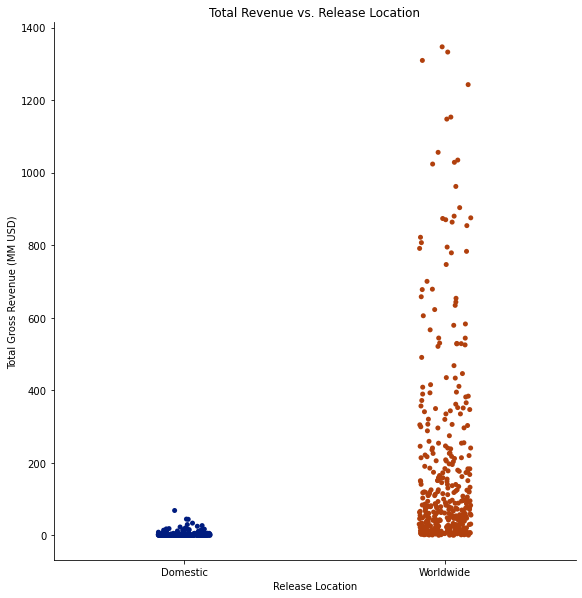

In [43]:
ax = sns.catplot(data=df_combined, x='release_location',y='total_gross_MM',
                height = 8,palette='dark')
ax.set(xlabel = 'Release Location', ylabel = 'Total Gross Revenue (MM USD)',
      title = 'Total Revenue vs. Release Location');

The graph clearly shows that movies released worldwide have a larger total gross revenue than movies only released domestically.

Microsoft should consider releasing their movies worldwide in order to make the most revenue.

### Effect of Genre on Total Revenue

Let's determine which movie genres produce the most revenue.

We must make some changes to the dataframe in order to do this comparison because the genre column has multiple genres for single movies. Let's make a row for each movie for each genre. That will make it easier to compare.

In [44]:
df_combined['genres'] = df_combined['genres'].str.split(pat=',')
df_combined

<ipython-input-44-f2d1653295b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['genres'] = df_combined['genres'].str.split(pat=',')


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,total_gross_MM,release_location
0,Wazir,Wazir,2016,103.0,"[Action, Crime, Drama]",7.1,15378,Relbig.,1100000.0,0.0,1.1000,Domestic
6,American Pastoral,American Pastoral,2016,108.0,"[Crime, Drama]",6.1,12898,LGF,544000.0,0.0,0.5440,Domestic
21,Wonder Woman,Wonder Woman,2017,141.0,"[Action, Adventure, Fantasy]",7.5,487527,WB,412600000.0,409300000.0,821.9000,Worldwide
28,The Only Living Boy in New York,The Only Living Boy in New York,2017,89.0,[Drama],6.3,8727,RAtt.,624000.0,1900000.0,2.5240,Worldwide
36,"Hail, Caesar!","Hail, Caesar!",2016,106.0,"[Comedy, Drama, Music]",6.3,111422,Uni.,30500000.0,33100000.0,63.6000,Worldwide
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Gold,Oro,2017,103.0,"[Adventure, Drama, History]",5.6,1103,Sony,5500.0,0.0,0.0055,Domestic
14,Boo 2! A Madea Halloween,Tyler Perry's Boo 2! A Madea Halloween,2017,101.0,"[Comedy, Drama, Horror]",3.8,3383,LGF,47300000.0,1000000.0,48.3000,Worldwide
15,Hiccup,Hichki,2018,116.0,"[Comedy, Drama]",7.5,7418,Yash,330000.0,3900000.0,4.2300,Worldwide
16,SuperFly,Superfly,2018,116.0,"[Action, Crime, Thriller]",5.0,4753,Sony,20500000.0,236000.0,20.7360,Worldwide


The step above made the genre column into a list with multiple genres instead of a string. Now we will explode the dataframe so each movie has a row for each genre.

In [45]:
df_genres = None
df_genres = df_combined.explode('genres')
df_genres

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,total_gross_MM,release_location
0,Wazir,Wazir,2016,103.0,Action,7.1,15378,Relbig.,1100000.0,0.0,1.1000,Domestic
0,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Relbig.,1100000.0,0.0,1.1000,Domestic
0,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Relbig.,1100000.0,0.0,1.1000,Domestic
6,American Pastoral,American Pastoral,2016,108.0,Crime,6.1,12898,LGF,544000.0,0.0,0.5440,Domestic
6,American Pastoral,American Pastoral,2016,108.0,Drama,6.1,12898,LGF,544000.0,0.0,0.5440,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...
15,Hiccup,Hichki,2018,116.0,Drama,7.5,7418,Yash,330000.0,3900000.0,4.2300,Worldwide
16,SuperFly,Superfly,2018,116.0,Action,5.0,4753,Sony,20500000.0,236000.0,20.7360,Worldwide
16,SuperFly,Superfly,2018,116.0,Crime,5.0,4753,Sony,20500000.0,236000.0,20.7360,Worldwide
16,SuperFly,Superfly,2018,116.0,Thriller,5.0,4753,Sony,20500000.0,236000.0,20.7360,Worldwide


Now let's order the genres by median total gross revenue. Because the data is quite skewed we will use median to better reflect the distribution of the data.

In [46]:
unique_genres=df_genres['genres'].unique()
unique_genres

array(['Action', 'Crime', 'Drama', 'Adventure', 'Fantasy', 'Comedy',
       'Music', 'History', 'Romance', 'Horror', 'Mystery', 'Biography',
       'Thriller', 'Sci-Fi', 'Family', 'Musical', 'Animation', 'Sport',
       'War', 'Documentary', 'Western'], dtype=object)

Here is an array of all the genres.

In [47]:
genre_dict = {}
for genre in unique_genres:
    genre_dict[genre] = df_genres.loc[df_genres['genres'] == genre].median()['total_gross_MM']
genre_dict

{'Action': 75.65,
 'Crime': 20.736,
 'Drama': 12.9,
 'Adventure': 189.35000000000002,
 'Fantasy': 123.89349999999999,
 'Comedy': 47.3,
 'Music': 12.95,
 'History': 14.45,
 'Romance': 8.4,
 'Horror': 43.0,
 'Mystery': 28.15,
 'Biography': 14.7,
 'Thriller': 29.25,
 'Sci-Fi': 314.54999999999995,
 'Family': 93.3,
 'Musical': 211.7,
 'Animation': 190.3,
 'Sport': 13.95,
 'War': 0.954,
 'Documentary': 0.6575,
 'Western': 29.8}

This is a dictionary with genres and the corresponding median total gross revenue.

In [48]:
df_genre_order = pd.DataFrame.from_dict(genre_dict,orient='index')
df_genre_order

,0
Action,75.6500
Crime,20.7360
Drama,12.9000
Adventure,189.3500
Fantasy,123.8935
Comedy,47.3000
Music,12.9500
History,14.4500
Romance,8.4000
Horror,43.0000


We made a dataframe with the genre dictionary and now we will order the genres by median total gross revenue.

In [49]:
df_genre_order = df_genre_order[0].sort_values(ascending = False)
df_genre_order

Sci-Fi         314.5500
Musical        211.7000
Animation      190.3000
Adventure      189.3500
Fantasy        123.8935
Family          93.3000
Action          75.6500
Comedy          47.3000
Horror          43.0000
Western         29.8000
Thriller        29.2500
Mystery         28.1500
Crime           20.7360
Biography       14.7000
History         14.4500
Sport           13.9500
Music           12.9500
Drama           12.9000
Romance          8.4000
War              0.9540
Documentary      0.6575
Name: 0, dtype: float64

Let's create an index to sort the data.

In [50]:
df_genre_order.index

Index(['Sci-Fi', 'Musical', 'Animation', 'Adventure', 'Fantasy', 'Family',
       'Action', 'Comedy', 'Horror', 'Western', 'Thriller', 'Mystery', 'Crime',
       'Biography', 'History', 'Sport', 'Music', 'Drama', 'Romance', 'War',
       'Documentary'],
      dtype='object')

Finally we will plot the median gross revenue vs. genre.

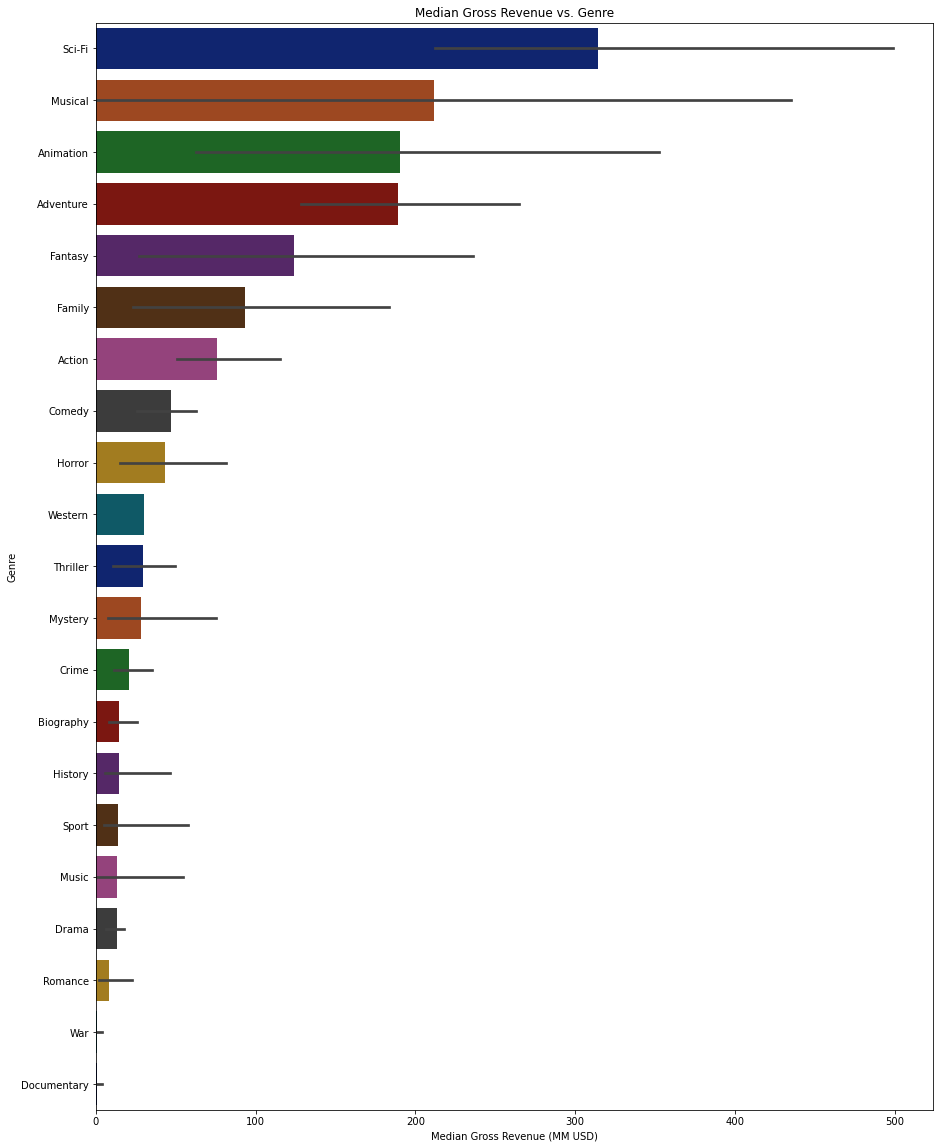

In [51]:
plt.figure(figsize=(15,20))
ax = sns.barplot(y=df_genres['genres'], x=df_genres['total_gross_MM'],
            estimator=np.median, order=df_genre_order.index ,
                 palette='dark')
ax.set(xlabel = 'Median Gross Revenue (MM USD)', ylabel = 'Genre',
      title = 'Median Gross Revenue vs. Genre');

The graph shows that movies in the Sci-Fi category have the greatest median gross revenue. This is followed by the Musical Genre, Animation, and Adventure genres.

Microsoft should consider making movies that fall under the following genres, in order: Sci-Fi, Musical, Animation, and Adventure.

### Effect of Rating on Total Revenue

Finally, let's compare IMDb rating with total gross revenue to see if creating highly rated movies will result in high revenue streams.

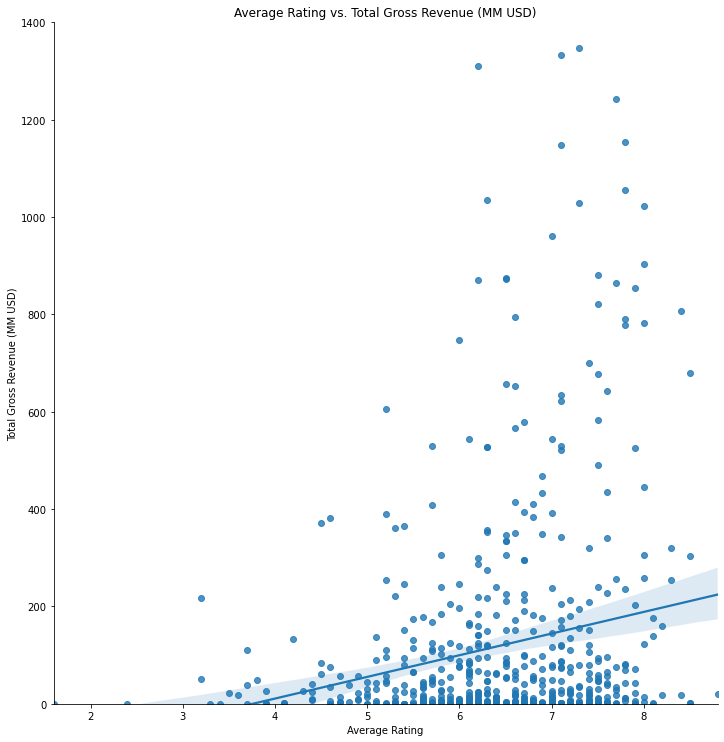

In [52]:
ax = sns.lmplot(data=df_combined, x='averagerating',y='total_gross_MM',
                height = 10, palette='dark')
ax.set(ylim=(0,1400))
ax.set(xlabel = 'Average Rating', ylabel = 'Total Gross Revenue (MM USD)',
      title = 'Average Rating vs. Total Gross Revenue (MM USD)');

The graph shows there is a positive correlation between Average Rating and Total Gross Revenue.


Microsoft should consider making audience favorite movies in order to make more revenue.

## Conclusion

After analyzing data from IMDb and Box Office Mojo, we have the following recommendations for Microsoft in order to create the most Total Gross Revenue for the movies that they create:

* Release films worldwide, not just domestically.
* Make Sci-Fi, Musical, Animation, or Adventure movies.
* Make movies which audiences enjoy and rate highly.

## Future Work

This project is just a preliminary analysis and more work could be done to provide additional recommendations for Microsoft. The following is a list of additional work that could be done:

* This analysis based success on total gross revenue. Microsoft may consider other metrics of success such as profit.


* A comparison between existing movie studios could be completed to determine which studios are successful. Microsoft could consider emulating or partnering with the most successful studios.


* Success of movies could be compared with actors and directors to determine if Microsoft should hire specific people.


* An analysis of movie runtime could be performed to determine if it affects movie success.